In [1]:
import serial
import hbat1 as hb

In [2]:
ser = serial.Serial('/dev/ttyACM1',115200,timeout=1)  # open serial port
print(ser.name)         # check which port was really used

/dev/ttyACM1


In [5]:
TX1=hb.MakeBroadcast(32*[0])
print("Packet to TX",TX1)
TX2=hb.ManchesterEncode(TX1)
print("Mancher encoded bytes:",TX2)
T=hb.Loopback(TX2)
S=hb.Decode(T)
print("Loopback packet:",S,"CRC=",hb.CRCcheck(S))
if True:
  ser.write(bytearray(TX2))
  D=hb.GetDelay(ser);
  D2=hb.NormDelays(D)
  print("Received delays:",D2[:10])
  S=hb.Decode(T)
  L=S[1]
  S1=S[:L+3]
  print("Received packet:",S1,"CRC=",hb.CRCcheck(S1))


#Try to decode it


Packet to TX [0, 37, 4, 0, 1, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 207]
Mancher encoded bytes: [0, 240, 87, 85, 85, 101, 153, 85, 89, 85, 85, 85, 149, 149, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 149, 165, 90, 170, 2]
Loopback bits: 111111111111000000010101010101
Loopback delay: [8 2 2 2 2 2 2 2 2 2 2 2 3 3 3 4 3 2 2 2 3 3 2 2 2 2 2 2 2 2]
Loopback packet: [0, 37, 4, 0, 1, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 207] CRC= 0
Received delays: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Received packet: [0, 37, 4, 0, 1, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 207] CRC= 0


[2.0, 2.05, 2.05, 2.05, 2.0, 2.05, 2.05, 2.05, 2.05, 2.0, 2.05, 3.0, 3.05, 3.0, 4.0, 3.0, 2.05, 2.05, 2.0, 3.05, 3.0, 2.05, 2.05, 2.0, 2.05, 2.05, 1.25, 2.05, 2.05, 2.0, 2.05, 2.05, 2.05, 2.0, 2.05, 2.05, 3.0, 3.05, 2.0, 3.05, 3.0, 2.05, 2.05, 2.0, 2.05, 2.05, 2.05, 2.0, 2.05, 2.05, 0.8, 2.05, 2.05, 2.0, 2.05, 2.05, 2.05, 2.0, 2.05, 2.05, 2.05, 2.05, 2.0, 2.05, 2.05, 2.05, 2.0, 1.85, 2.05, 2.0, 2.05, 2.05, 2.05, 2.05, 2.0, 2.05, 1.2, 2.05, 2.05, 2.05]


Text(0.5,1,'Normalised delays')

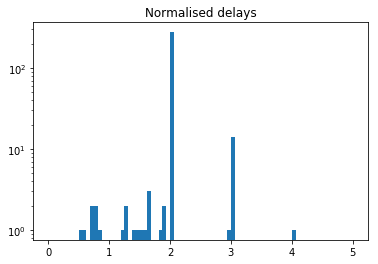

In [19]:
D2=[(d+3)/20. for d in D[1:]]
print(D2[:80])
plt.hist(D2,bins=80,range=(0,5),log=True);
plt.title("Normalised delays")

In [ ]:
ser.close()